<a href="https://colab.research.google.com/github/alirezash97/BRATS2015/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!sudo apt-get install python-pip python-numpy python-scipy libboost-python-dev build-essential

In [0]:
!sudo pip install nibabel pydicom medpy

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"alirezashafaei97","key":"9cb262aa0c5658ffc4eb45857c41903c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/brain-tumor-segmentation-in-mri-brats-2015 -p /content



In [0]:
!unzip /content/brain-tumor-segmentation-in-mri-brats-2015.zip -d /content/BTS

In [0]:
from medpy.io import load
import matplotlib.pyplot as plt

mage_data_flair, image_header_flair = load('/content/BTS/train/HGG/brats_tcia_pat131_0001/VSD.Brain.XX.O.MR_Flair.35561.mha')
mage_data_T1, image_header_T1 = load('/content/BTS/train/HGG/brats_tcia_pat131_0001/VSD.Brain.XX.O.MR_T1.35564.mha')
mage_data_T1c, image_header_T1c = load('/content/BTS/train/HGG/brats_tcia_pat131_0001/VSD.Brain.XX.O.MR_T1c.35563.mha')
mage_data_T2, image_header_T2 = load('/content/BTS/train/HGG/brats_tcia_pat131_0001/VSD.Brain.XX.O.MR_T2.35562.mha')
mage_data_T, image_header_T = load('/content/BTS/train/HGG/brats_tcia_pat131_0001/VSD.Brain_3more.XX.O.OT.42303.mha')

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def ploter(image_data):
  fig=plt.figure(figsize=(10, 10))
  columns = 4
  rows = 5
  counter = 0
  for i in range(40, 52):
      counter += 1
      img = mage_data[:, :, i]
      fig.add_subplot(rows, columns, counter)
      plt.imshow(img, cmap='gray')
  plt.show()


this is FLAIR MRI


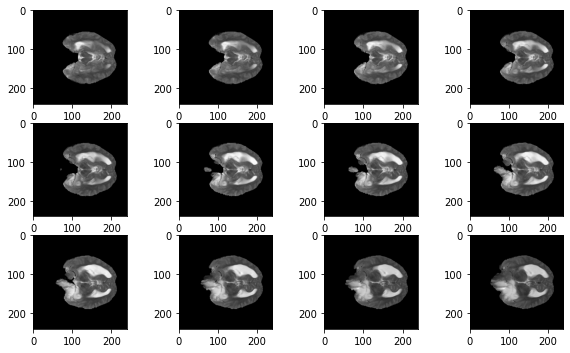

this is T1 MRI


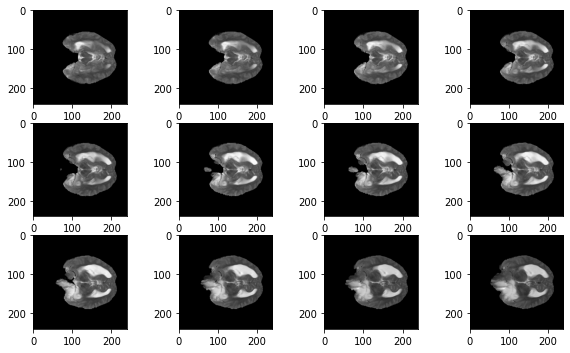

this is T1c MRI


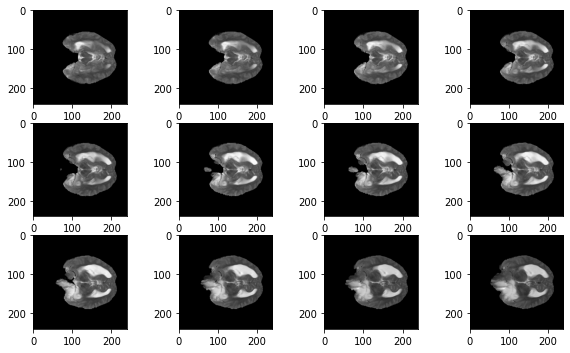

this is T2 MRI


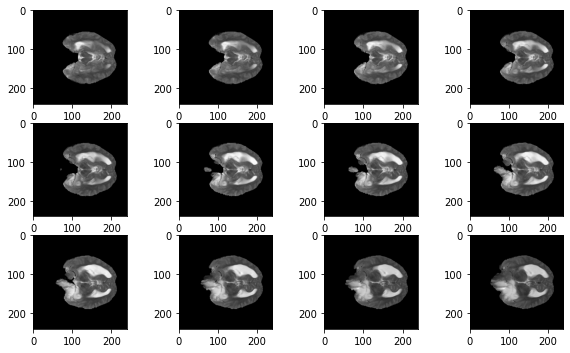

this is T MRI


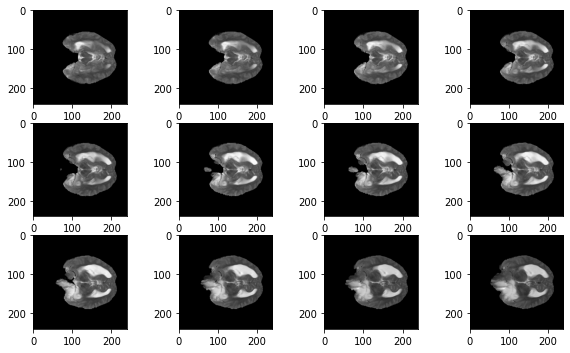

In [139]:
print("this is FLAIR MRI")
ploter(mage_data_flair)
print("this is T1 MRI")
ploter(mage_data_T1)
print("this is T1c MRI")
ploter(mage_data_T1c)
print("this is T2 MRI")
ploter(mage_data_T2)
print("this is T MRI")
ploter(mage_data_T)